**Importing libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image
import pydotplus
import os
import statsmodels.api as sm

**Importing dataset**

In [3]:
file_path = '/content/drive/MyDrive/songs_utf.csv'
df = pd.read_csv(file_path)
df.shape

(1999, 27)

**Pre processing**

In [4]:
df.columns

Index(['artist', 'song', 'song_name_len', 'duration_ms', 'explicit', 'year',
       'popularity', 'hot', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'genre', 'pop', 'rock', 'hiphop', 'dance', 'folk',
       'rnb', 'latin'],
      dtype='object')

In [5]:
df.dtypes

artist               object
song                 object
song_name_len       float64
duration_ms         float64
explicit             object
year                float64
popularity          float64
hot                 float64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
pop                 float64
rock                float64
hiphop              float64
dance               float64
folk                float64
rnb                 float64
latin               float64
dtype: object

In [6]:
df1 = df

In [7]:
df1['artist'] = df1['artist'].astype('category').cat.codes
df1['explicit'] = df1['explicit'].astype('category').cat.codes
df1['year'] = df1['year'].astype('category').cat.codes
df1['hot'] = df1['hot'].astype('category').cat.codes
df1['key'] = df1['key'].astype('category').cat.codes
df1['mode'] = df1['mode'].astype('category').cat.codes
df1['genre'] = df1['genre'].astype('category').cat.codes
df1['pop'] = df1['pop'].astype('category').cat.codes
df1['rock'] = df1['rock'].astype('category').cat.codes
df1['hiphop'] = df1['hiphop'].astype('category').cat.codes
df1['dance'] = df1['dance'].astype('category').cat.codes
df1['folk'] = df1['folk'].astype('category').cat.codes
df1['rnb'] = df1['rnb'].astype('category').cat.codes
df1['latin'] = df1['latin'].astype('category').cat.codes

In [8]:
df1.dtypes

artist                int16
song                 object
song_name_len       float64
duration_ms         float64
explicit               int8
year                   int8
popularity          float64
hot                    int8
danceability        float64
energy              float64
key                    int8
loudness            float64
mode                   int8
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                  int8
pop                    int8
rock                   int8
hiphop                 int8
dance                  int8
folk                   int8
rnb                    int8
latin                  int8
dtype: object

**Missing values**

In [9]:
df1.shape

(1999, 27)

In [10]:
display(df1.isna().sum())
df1.shape

artist                0
song                499
song_name_len       499
duration_ms         499
explicit              0
year                  0
popularity          499
hot                   0
danceability        499
energy              499
key                   0
loudness            499
mode                  0
speechiness         499
acousticness        499
instrumentalness    499
liveness            499
valence             499
tempo               499
genre                 0
pop                   0
rock                  0
hiphop                0
dance                 0
folk                  0
rnb                   0
latin                 0
dtype: int64

(1999, 27)

In [11]:
df1 = df1.dropna()
display(df1.isna().sum())
df1.shape

artist              0
song                0
song_name_len       0
duration_ms         0
explicit            0
year                0
popularity          0
hot                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
pop                 0
rock                0
hiphop              0
dance               0
folk                0
rnb                 0
latin               0
dtype: int64

(1500, 27)

**Summary of data**

In [12]:
df_summary = df1.describe()
df_summary

,artist,song_name_len,duration_ms,explicit,year,popularity,hot,danceability,energy,key,...,valence,tempo,genre,pop,rock,hiphop,dance,folk,rnb,latin
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,302.924000,17.552667,234667.923333,0.244000,9.034000,59.414000,0.128000,0.659393,0.737019,5.365333,...,0.573458,119.884948,24.430000,0.823333,0.134000,0.385333,0.158000,0.010667,0.264667,0.025333
std,179.530147,11.541289,38723.131986,0.429636,4.567722,19.346045,0.334201,0.142157,0.151874,3.587447,...,0.221088,26.762101,10.180088,0.381514,0.340766,0.486836,0.364863,0.102762,0.441303,0.157188
min,0.000000,2.000000,127920.000000,0.000000,0.000000,0.000000,0.000000,0.129000,0.054900,0.000000,...,0.038100,60.019000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,144.750000,9.000000,209116.500000,0.000000,5.000000,56.000000,0.000000,0.568000,0.645750,2.000000,...,0.411000,98.551250,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,303.000000,14.000000,228973.000000,0.000000,9.000000,64.000000,0.000000,0.670000,0.754000,6.000000,...,0.584000,120.092500,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,448.000000,23.000000,254086.000000,0.000000,13.000000,71.000000,0.000000,0.758000,0.857250,8.000000,...,0.755250,133.126250,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,641.000000,75.000000,484146.000000,1.000000,22.000000,89.000000,1.000000,0.975000,0.999000,11.000000,...,0.973000,210.851000,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Subsetting the dataframe**

In [13]:
df_new = df1[["artist", "duration_ms", "explicit", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "pop", "rock", "hiphop", "dance", "folk", "rnb", "latin", "hot"]]

**Setting train and test datasets**

In [14]:
X = (df_new.iloc[:,:-1])
y = (df_new.iloc[:, -1])
y = y.astype('int')


X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 1)

# **1. Decision Tree**

**Tree Induction:**

In [15]:
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=12, min_samples_split = 5, random_state=0)

dt_clf = dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

**Tree Visualization**

In [16]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
import matplotlib as mpl



def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

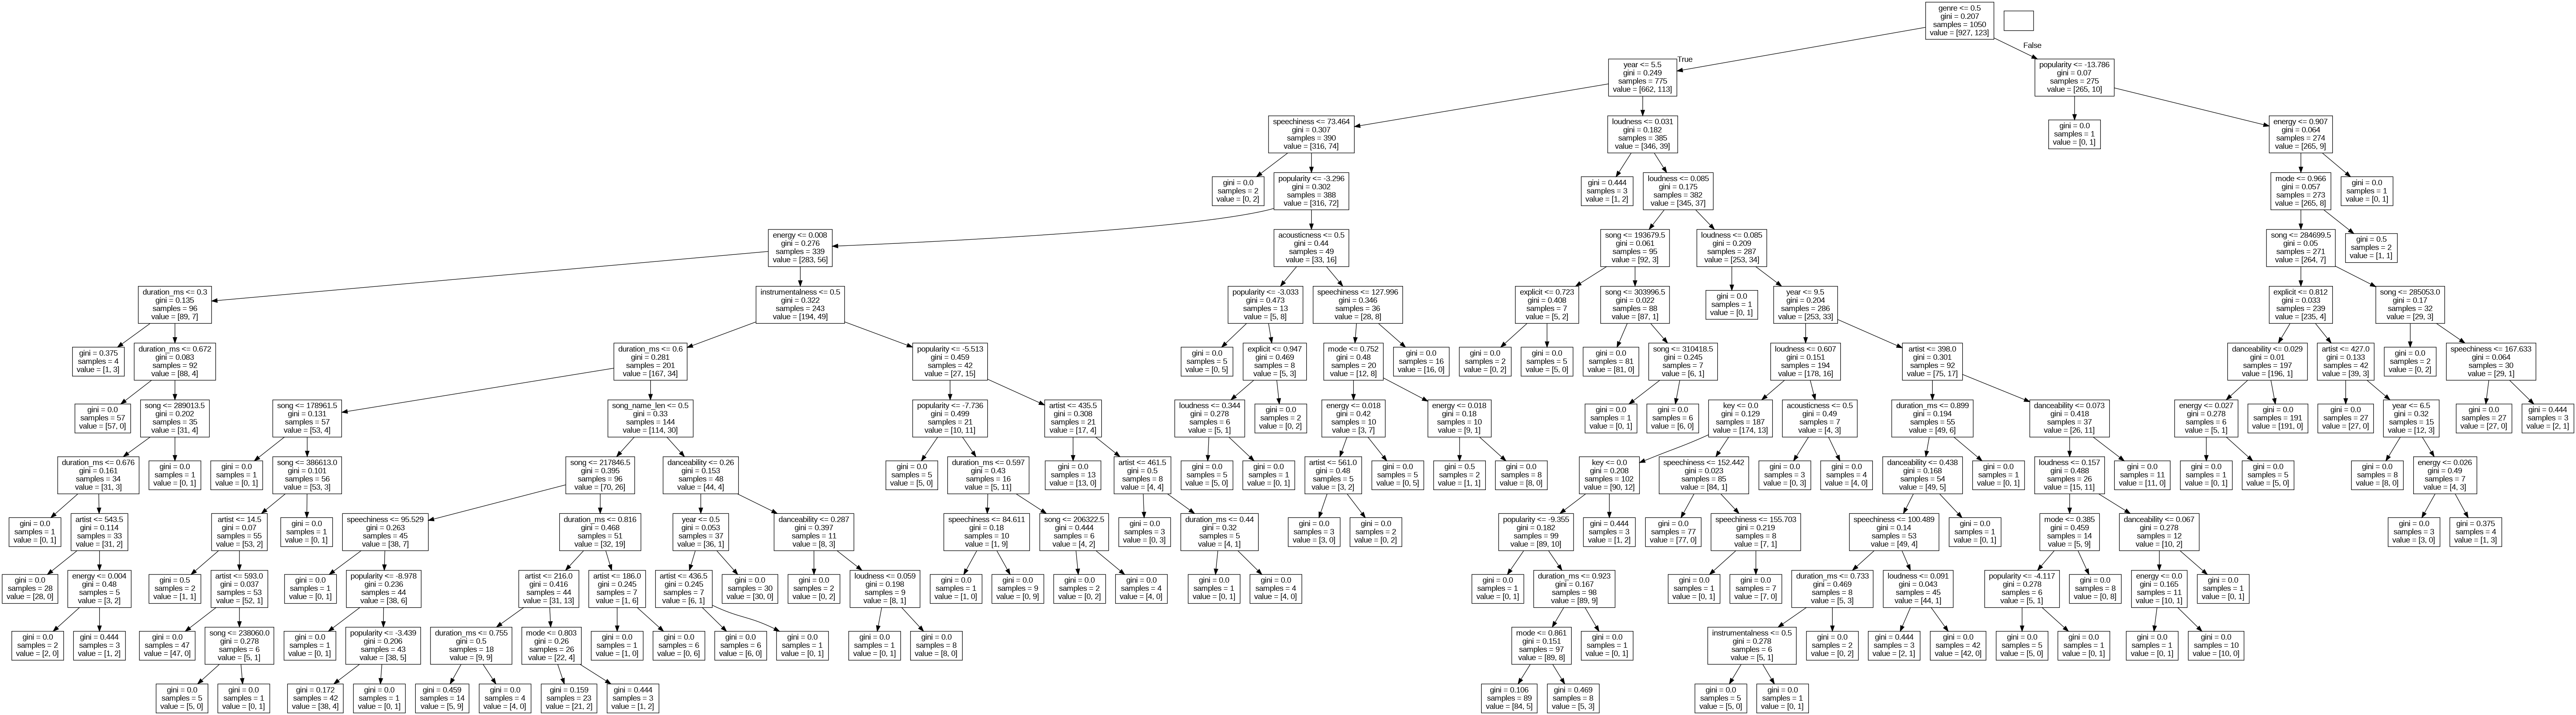

In [17]:
feature_names = df.columns.tolist()
feature_names = feature_names[0:21]
target_name = np.array(['Popular', 'Not popular'])

dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

dt_graph = pydotplus.graph_from_dot_data
draw_decision_tree(dt_clf)

**Validation**

In [18]:
import sklearn.metrics as mt

print('Train_Accuracy: ', dt_clf.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  0.9714285714285714 

Accuracy:  0.81 

Recall:  0.25 

Precision:  0.33 

F1_score:  0.28 

Confusion Matrix: 
 [[346  35]
 [ 52  17]]


**Cross Validation**

In [19]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict

y_pred_cross = cross_val_predict(dt_clf, X, y, cv=10)
accuracy = mt.accuracy_score(y, y_pred_cross)
recall = mt.recall_score(y, y_pred_cross)
precision = mt.precision_score(y, y_pred_cross)
f1_score = mt.f1_score(y, y_pred_cross)
matrix = mt.confusion_matrix(y, y_pred_cross)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.80 

Recall:  0.16 

Precision:  0.18 

F1_score:  0.17 

Confusion Matrix: 
 [[1166  142]
 [ 161   31]]


**Parameter Tuning (Pruning)**

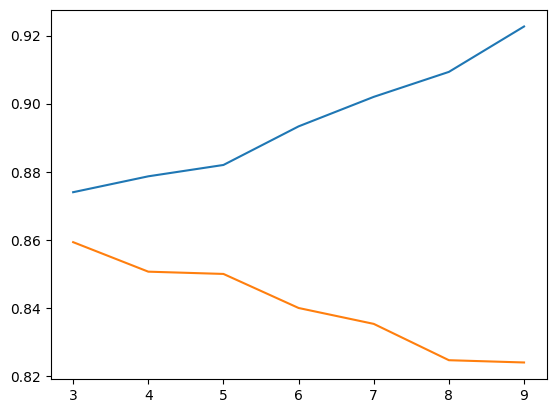

In [20]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


mean_test_accuracy = []
train_accuracy = []
for max_depth in np.arange(3, 10):
    model1 = DecisionTreeClassifier(max_depth=max_depth).fit(X, y)
    train_accuracy.append(accuracy_score(y, model1.predict(X)))
    mean_test_accuracy.append(cross_val_score(model1, X, y, scoring="accuracy", cv=5).mean())


plt.plot(np.arange(3, 10), train_accuracy)
plt.plot(np.arange(3, 10), mean_test_accuracy)
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

t_clf = DecisionTreeClassifier(random_state=0)
parameters = {'max_depth': [4, 8,12],
              'min_samples_split': [5, 10, 15],
              'splitter': ['best', 'random'],}

grid_dt = GridSearchCV(dt_clf, param_grid = parameters, cv = 5 )

grid_dt.fit(X_train, y_train)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,min_samples_split,splitter,mean_test_score
5,4,15,random,0.883810
1,4,5,random,0.881905
3,4,10,random,0.880000
0,4,5,best,0.870476
2,4,10,best,0.870476
4,4,15,best,0.870476
11,8,15,random,0.861905
9,8,10,random,0.857143
7,8,5,random,0.852381
17,12,15,random,0.848571


**Decision Tree after pruning**

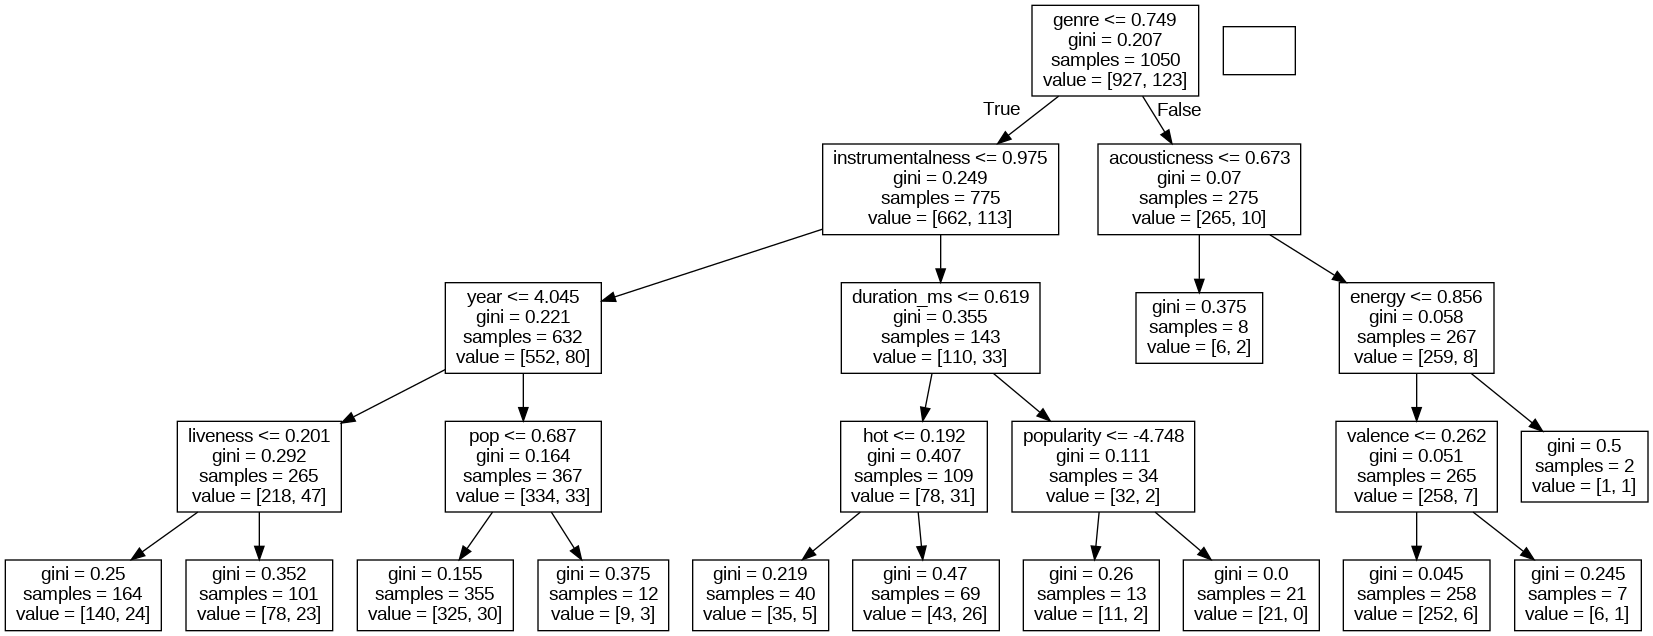

In [22]:
dt_clf = DecisionTreeClassifier( max_depth=4, min_samples_split = 15, splitter= 'random', random_state=0)
dt_clf = dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

feature_names = df.columns.tolist()
feature_names = feature_names[0:21]
target_name = np.array(['Popular', 'Not Popular'])

dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

dt_graph = pydotplus.graph_from_dot_data
draw_decision_tree(dt_clf)

**Cross Validation**

In [23]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict

y_pred_cross = cross_val_predict(dt_clf, X, y, cv=10)
accuracy = mt.accuracy_score(y, y_pred_cross)
recall = mt.recall_score(y, y_pred_cross)
precision = mt.precision_score(y, y_pred_cross)
f1_score = mt.f1_score(y, y_pred_cross)
matrix = mt.confusion_matrix(y, y_pred_cross)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.86 

Recall:  0.01 

Precision:  0.07 

F1_score:  0.01 

Confusion Matrix: 
 [[1295   13]
 [ 191    1]]


# **2. Logistic Regression**

**Subsetting dataset**

In [24]:
df_logit = df1[["song_name_len", "duration_ms", "explicit", "danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "pop", "rock", "hiphop", "dance", "folk", "rnb", "latin", "hot"]]

**Setting train and test data**

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = (df_logit.iloc[:,:-1])
y = (df_logit.iloc[:, -1])
y = y.astype('int')

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 1)

In [26]:
X_train.shape

(1050, 20)

**Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as mt

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Train_Accuracy: ', model.score(X_train, y_train),'\n')


Train_Accuracy:  0.8828571428571429 



**Vizualization using table**

In [29]:
model = sm.Logit(y_train, X_train)
results = model.fit(method = "newton")
features = list(df_logit.iloc[:, 0:-1].columns)
results.summary(xname=features)

Optimization terminated successfully.
         Current function value: 0.678039
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    hot   No. Observations:                 1050
Model:                          Logit   Df Residuals:                     1030
Method:                           MLE   Df Model:                           19
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                 -0.8772
Time:                        01:54:40   Log-Likelihood:                -711.94
converged:                       True   LL-Null:                       -379.25
Covariance Type:            nonrobust   LLR p-value:                     1.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
song_name_len       -0.1028      0.064     -1.597      0.110      -0.229       0.023
duration_ms          0.0209      0.066      0.316      0.752      -0.109       0.151
explicit            -0.1574      0.076     -2.063      0.039      -0.307      -0.008
danceability         0.0430      0.081      0.531      0.596      -0.116       0.202
energy              -0.0578      0.096     -0.599      0.549      -0.247       0.131
key                 -0.0847      0.063     -1.335      0.182      -0.209       0.040
loudness             0.1211      0.082      1.479      0.139      -0.039       0.282
speechiness         -0.0013      0.074     -0.018      0.986      -0.147       0.144
acousticness         0.0156      0.072      0.218      0.828      -0.125       0.156
instrumentalness    -0.0494      0.072     -0.681      0.496      -0.191       0.093
liveness            -0.0079      0.064     -0.123      0.902      -0.134       0.118
valence             -0.0853      0.080     -1.063      0.288      -0.242       0.072
tempo               -0.0408      0.066     -0.620      0.535      -0.170       0.088
pop                 -0.0773      0.068     -1.132      0.258      -0.211       0.057
rock                 0.1026      0.073      1.406      0.160      -0.040       0.246
hiphop               0.0771      0.080      0.969      0.333      -0.079       0.233
dance               -0.0907      0.069     -1.315      0.189      -0.226       0.044
folk                -0.0375      0.057     -0.655      0.513      -0.150       0.075
rnb                 -0.1961      0.071     -2.759      0.006      -0.335      -0.057
latin                0.0490      0.067      0.733      0.464      -0.082       0.180
====================================================================================
"""

**Validation**

In [30]:
accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.85 

Recall:  0.00 

Precision:  0.00 

F1_score:  0.00 

Confusion Matrix: 
 [[381   0]
 [ 69   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Cross Validation**

In [31]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict

model = LogisticRegression()

y_pred_cross = cross_val_predict(model, X, y, cv=10)
accuracy = mt.accuracy_score(y, y_pred_cross)
recall = mt.recall_score(y, y_pred_cross)
precision = mt.precision_score(y, y_pred_cross)
f1_score = mt.f1_score(y, y_pred_cross)
matrix = mt.confusion_matrix(y, y_pred_cross)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.87 

Recall:  0.00 

Precision:  0.00 

F1_score:  0.00 

Confusion Matrix: 
 [[1307    1]
 [ 192    0]]


# **3. K Nearest Neighbour**

In [32]:
df_knn = df1[["song_name_len", "duration_ms", "explicit", "danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "pop", "rock", "hiphop", "dance", "folk", "rnb", "latin", "hot"]]
df_knn.head()

,song_name_len,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,...,valence,tempo,pop,rock,hiphop,dance,folk,rnb,latin,hot
0,22.0,211160.0,0,0.751,0.834,1,-5.444,0.0437,0.3000,0.000018,...,0.894,95.053,1,0,0,0,0,0,0,1
1,20.0,167066.0,0,0.434,0.897,0,-4.918,0.0488,0.0103,0.000000,...,0.684,148.726,1,1,0,0,0,0,0,1
2,7.0,250546.0,0,0.529,0.496,7,-9.007,0.0290,0.1730,0.000000,...,0.278,136.859,1,0,0,0,0,0,0,0
3,12.0,224493.0,0,0.551,0.913,0,-4.063,0.0466,0.0263,0.000013,...,0.544,119.992,0,1,0,0,0,0,0,1
4,11.0,200560.0,0,0.614,0.928,8,-4.806,0.0516,0.0408,0.001040,...,0.879,172.656,1,0,0,0,0,0,0,0


**Normalization**

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = (df_knn.iloc[:,:-1])
y = (df_knn.iloc[:, -1])
y = y.astype('int')

X = scaler.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 1)

**Model fit**

In [35]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Train_Accuracy: ', model.score(X_train, y_train),'\n')

Train_Accuracy:  0.9133333333333333 



**Validation**

In [36]:
import sklearn.metrics as mt

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.84 

Recall:  0.14 

Precision:  0.42 

F1_score:  0.22 

Confusion Matrix: 
 [[367  14]
 [ 59  10]]


**Cross Validation**

In [37]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict

model = KNeighborsClassifier(n_neighbors = 3)

y_pred_cross = cross_val_predict(model, X, y, cv=10)
accuracy = mt.accuracy_score(y, y_pred_cross)
recall = mt.recall_score(y, y_pred_cross)
precision = mt.precision_score(y, y_pred_cross)
f1_score = mt.f1_score(y, y_pred_cross)
matrix = mt.confusion_matrix(y, y_pred_cross)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.84 

Recall:  0.13 

Precision:  0.24 

F1_score:  0.17 

Confusion Matrix: 
 [[1230   78]
 [ 167   25]]


**Parameter Tuning (Pruning)**

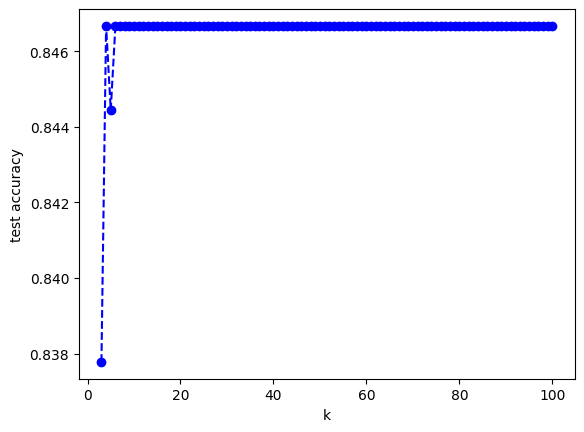

In [38]:
import matplotlib.pyplot as plt

k_range = range(3,101)

accuracy_list = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_list.append(mt.accuracy_score(y_test, y_pred))

# k = sqrt(N)

plt.plot(k_range, accuracy_list, 'o--', color = 'blue')
plt.xlabel("k")
plt.ylabel("test accuracy")
plt.show()